# 1.1 Create a table showing the intercept and slope coefficients for the ten industry portfolios.

In [1]:
from IPython.display import Image

In [2]:
Image(filename = '1.png')

FileNotFoundError: [Errno 2] No such file or directory: '1.png'

# 1.2 Briefly explain the economic significance of the intercept and slope coefficients.¶

### The intercept α is also called pricing error and it measures the accuracy of our model in predicting the excess return of the asset/portfolio.

### The slope β reflects the sensitiveness of the asset/portfolio related to the market risk premium.

# 2.1 Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio.

In [ ]:
Image(filename = '2.1.png', width = 300, height = 300)

In [ ]:
Image(filename = '2.12.png',width = 200, height = 200)

# 2.2 Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β's.¶

In [ ]:
Image(filename = '2.2.png')

# 2.3 Use the estimated intercept and slope coefficients for the SML to plot the SML in the range of β from zero to two on the horizontal axis. Also plot the positions of the ten industry portfolios and the market portfolio.

In [ ]:
Image(filename = '2.3.png')

# 2.4 Briefly explain the economic significance of the SML.¶

### Security Market Line is a graphical representation of the CAMP model. It shows how the returns of the assets or portfolios reacts to the market risk which represented by Beta.

### The assets falling below the SML means the asset or portflio is over-valued and investors should sell the asset or portfolio. In turn, the price of the asset or portfolio will drop and the return becomes higher until it is back to the SML.

### The assets lying above the SML means the asset or portfolio is under-valued and investors should buy the asset or portfolio. In turn, the asset or portfolio will fall down until it reaches SML.

# Coding Part

In [3]:
import numpy as np

import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('dark')

import statsmodels.api as sm

In [4]:
Industry_Portfolio = pd.read_excel('/Users/jiaminglv/Desktop/jupy files/mqf financial engineering/Asset Pricing HW/Industry_Portfolios.xlsx')

/Users/jiaminglv/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
M_Portfolio = pd.read_excel('/Users/jiaminglv/Desktop/jupy files/mqf financial engineering/Asset Pricing HW/Market_Portfolio.xlsx')

/Users/jiaminglv/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [6]:
Industry_Portfolio.head()

,Date,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86


In [7]:
Industry_Portfolio_Data = Industry_Portfolio.drop(['Date'], axis = 1)

Industry_Portfolio_Data.head()

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86


In [8]:
M_Portfolio.head()

,Date,Market
0,200401,2.22
1,200402,1.46
2,200403,-1.23
3,200404,-1.75
4,200405,1.23


In [9]:
M_Portfolio_Return = M_Portfolio['Market'].values

In [10]:
Rf = 0.13

In [11]:
M_Excess_return = M_Portfolio_Return - Rf

M_Excess_return 

array([  2.09,   1.33,  -1.36,  -1.88,   1.1 ,   1.81,  -4.1 ,   0.06,
         1.58,   1.41,   4.56,   3.45,  -2.73,   1.92,  -1.89,  -2.53,
         3.76,   0.67,   4.03,  -1.05,   0.65,  -1.88,   3.79,  -0.06,
         3.26,  -0.09,   1.7 ,   0.96,  -3.27,  -0.08,  -0.51,   2.32,
         2.12,   3.51,   2.  ,   1.14,   1.71,  -1.71,   0.98,   3.8 ,
         3.52,  -1.69,  -3.46,   1.21,   3.41,   1.99,  -4.62,  -0.73,
        -6.27,  -3.09,  -0.9 ,   4.65,   1.91,  -8.4 ,  -0.75,   1.53,
        -9.22, -17.28,  -7.96,   1.62,  -8.25, -10.22,   8.84,  10.07,
         5.08,   0.31,   7.6 ,   3.2 ,   3.96,  -2.72,   5.43,   2.63,
        -3.49,   3.27,   6.2 ,   1.88,  -8.01,  -5.68,   6.8 ,  -4.89,
         9.42,   3.76,   0.48,   6.7 ,   1.89,   3.37,   0.35,   2.77,
        -1.4 ,  -1.88,  -2.47,  -6.12,  -7.73,  11.21,  -0.39,   0.61,
         4.93,   4.3 ,   2.98,  -0.97,  -6.32,   3.75,   0.66,   2.44,
         2.62,  -1.87,   0.65,   1.06,   5.45,   1.15,   3.9 ,   1.43,
      

In [12]:
Excesss_Return_of_Ten_Industry = Industry_Portfolio_Data - Rf

Excesss_Return_of_Ten_Industry

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,-0.07,-1.20,-0.75,0.31,4.40,1.28,0.32,2.96,1.79,2.75
1,4.12,-0.20,1.82,4.56,-3.05,-0.65,5.96,0.76,1.94,2.03
2,-0.22,-1.28,-0.40,-0.26,-2.68,-2.20,0.16,-4.09,1.00,-0.76
3,1.29,2.17,-0.30,2.39,-5.04,-0.61,-2.83,3.41,-3.68,-3.89
4,-2.02,-1.77,1.48,0.26,4.72,-3.08,0.17,-0.55,1.15,1.73
...,...,...,...,...,...,...,...,...,...,...
115,-4.13,-1.13,-2.08,-1.96,-0.25,-3.41,-4.34,-3.62,-4.56,-3.79
116,1.81,6.33,5.07,1.90,3.64,4.20,4.33,4.06,0.92,3.70
117,4.62,0.59,4.43,4.73,3.67,5.39,4.95,3.34,3.22,3.74
118,1.16,1.68,2.82,0.72,3.52,0.14,3.54,4.41,-1.94,4.61


# 1.1 Create a table showing the intercept and slope coefficients for the ten industry portfolios.

In [13]:
β = []
α = []
def func(dataframe):
    for i in dataframe.columns:
        β.append(stats.linregress(M_Excess_return, dataframe[i])[0])
        α.append(stats.linregress(M_Excess_return,dataframe[i])[1])

func(Excesss_Return_of_Ten_Industry)

β = pd.DataFrame(β).T
α = pd.DataFrame(α).T

combined_beta_alpha = pd.concat([α,β], axis = 0)
combined_beta_alpha.index = ['intercept','slope']
combined_beta_alpha.columns = ['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth',
       'Utils', 'Other']
combined_beta_alpha

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
intercept,0.369443,-0.415599,0.159771,0.501719,-0.064020,0.194691,0.275492,0.237841,0.444585,-0.387135
slope,0.652647,1.648536,1.169846,0.969850,1.132969,0.900729,0.826492,0.673036,0.538086,1.207309


# 1.2 Briefly explain the economic significance of the intercept and slope coefficients.

### The intercept α is also called pricing error and it measures the accuracy of our model in predicting the excess return of the asset/portfolio. 

### The slope β reflects the sensitiveness of the asset/portfolio related to the market risk premium. 

# 2.1 Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio.

In [14]:
Industry_Portfolio_Data_Mean = Industry_Portfolio_Data.mean()

Industry_Portfolio_Data_Mean

NoDur    0.902833
Durbl    0.733333
Manuf    1.012833
Enrgy    1.231167
HiTec    0.766250
Telcm    0.881417
Shops    0.916333
Hlth     0.783833
Utils    0.907167
Other    0.489083
dtype: float64

In [15]:
M_Portfolio_Mean = M_Portfolio['Market'].mean()

M_Portfolio_Mean

0.7480833333333332

# 2.2 Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β's.

In [16]:
Industry_Portfolio_Data_Mean['M_Portfolio'] = 0.7480833333333334

Industry_Portfolio_Data_Mean = pd.DataFrame(Industry_Portfolio_Data_Mean, columns = ['return'])

In [17]:
Industry_Portfolio_Data_Mean

,return
NoDur,0.902833
Durbl,0.733333
Manuf,1.012833
Enrgy,1.231167
HiTec,0.766250
Telcm,0.881417
Shops,0.916333
Hlth,0.783833
Utils,0.907167
Other,0.489083


In [18]:
combined_beta_alpha_slope = combined_beta_alpha.loc['slope']

combined_beta_alpha_slope['M_Portfolio'] = 1

combined_beta_alpha_slope = pd.DataFrame(combined_beta_alpha_slope)

In [19]:
combined_beta_alpha_slope

,slope
NoDur,0.652647
Durbl,1.648536
Manuf,1.169846
Enrgy,0.969850
HiTec,1.132969
Telcm,0.900729
Shops,0.826492
Hlth,0.673036
Utils,0.538086
Other,1.207309


In [20]:
combined_return_slope = pd.concat([Industry_Portfolio_Data_Mean,combined_beta_alpha_slope],axis =1)

combined_return_slope 

,return,slope
NoDur,0.902833,0.652647
Durbl,0.733333,1.648536
Manuf,1.012833,1.169846
Enrgy,1.231167,0.969850
HiTec,0.766250,1.132969
Telcm,0.881417,0.900729
Shops,0.916333,0.826492
Hlth,0.783833,0.673036
Utils,0.907167,0.538086
Other,0.489083,1.207309


In [21]:
slope,intercept = stats.linregress(combined_return_slope['slope'],combined_return_slope['return'])[0:2]
slope,intercept

(-0.18546745836573264, 1.0327683682657056)

# 2.3 Use the estimated intercept and slope coefficients for the SML to plot the SML in the range of β from zero to two on the horizontal axis. Also plot the positions of the ten industry portfolios and the market portfolio.

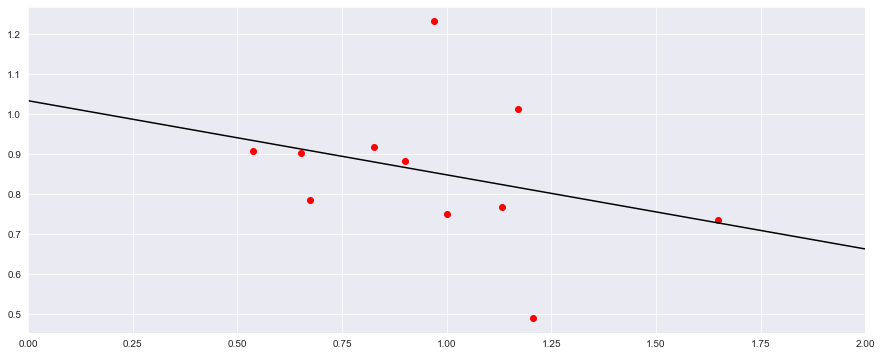

In [24]:
def linear_func(x):
    return slope * x + intercept

plt.figure(figsize = (15,6))

x = np.linspace(0,2)

plt.xlim((0,2))

plt.grid()

plt.plot(x, linear_func(x) , color = 'k')

plt.scatter(combined_return_slope['slope'],combined_return_slope['return'], color = 'r')

# name = ['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth',
#        'Utils', 'Other', 'M_Portfolio']

# slope_data = [0.65264736, 1.64853565, 1.1698463 , 0.96984996, 1.13296944,
#        0.90072925, 0.8264924 , 0.6730357 , 0.5380861 , 1.20730946,
#        1.]

# return_data = [0.90283333, 0.73333333, 1.01283333, 1.23116667, 0.76625,
#        0.88141667, 0.91633333, 0.78383333, 0.90716667, 0.48908333,
#        0.74808333]

# for i in range (len(slope_data)):
#     plt.annotate(name[i], xy = (slope_data[i],return_data[i]), 
#                  xytext = (slope_data[i]+0.01,return_data[i]+0.01), color = 'r', fontsize = 13, alpha = 0.6)
plt.show()

# 2.4 Briefly explain the economic significance of the SML.

### Security Market Line is a graphical representation of the CAMP model. It shows how the returns of the assets or portfolios reacts to the market risk which represented by Beta. 

### The assets falling below the SML means the asset or portflio is over-valued and investors should sell the asset or portfolio. In turn, the price of the asset or portfolio will drop and the return becomes higher until it is back to the SML. 

### The assets lying above the SML means the asset or portfolio is under-valued and investors should buy the asset or portfolio. In turn, the asset or portfolio will fall down until it reaches SML.